<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.1.1: K-Means by the algorithm

### Australian athletes data set

##### Description
These data were collected in a study of how data on various characteristics of the bloood varied with sport body size and sex of the athlete.

Usage
data(ais)
Format
A data frame with 202 observations on the following 13 variables.

rcc
red blood cell count, in

wcc
while blood cell count, in per liter

hc
hematocrit, percent

hg
hemaglobin concentration, in g per decaliter

ferr
plasma ferritins, ng

bmi
Body mass index, kg

ssf
sum of skin folds

pcBfat
percent Body fat

lbm
lean body mass, kg

ht
height, cm

wt
weight, kg

sex
a factor with levels f m

sport
a factor with levels B_Ball Field Gym Netball Row Swim T_400m T_Sprnt Tennis W_Polo

Details
Do blood hemoglobin concentrations of athletes in endurance-related events differ from those in power-related events?

Source
These data were the basis for the analyses that are reported in Telford and Cunningham (1991).

References
Telford, R.D. and Cunningham, R.B. 1991. Sex, sport and body-size dependency of hematology in highly trained athletes. Medicine and Science in Sports and Exercise 23: 788-794.

**References**

[Data](http://vincentarelbundock.github.io/Rdatasets/csv/DAAG/ais.csv)

[Data Dictionary](http://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html)

In [1]:
# IMPORT LIBRARIES
## Import Libraries

import numpy as np
import pandas as pd


%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import datasets
import seaborn as sns

In [2]:
# !!! make sure to scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

### 1. Import the data

In [44]:
csv_file = '../data/ais.csv'
df = pd.read_csv(csv_file)

In [45]:
df.head()

,Unnamed: 0,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
0,1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
1,2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
2,3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
3,4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
4,5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


### 2. Do some EDA of relationships between features.

In [53]:
df1 = df.copy()

In [54]:
df1 = df.drop(['Unnamed: 0'], axis=1)

In [55]:
df1.head()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
0,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
1,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
2,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
3,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
4,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rcc     202 non-null    float64
 1   wcc     202 non-null    float64
 2   hc      202 non-null    float64
 3   hg      202 non-null    float64
 4   ferr    202 non-null    int64  
 5   bmi     202 non-null    float64
 6   ssf     202 non-null    float64
 7   pcBfat  202 non-null    float64
 8   lbm     202 non-null    float64
 9   ht      202 non-null    float64
 10  wt      202 non-null    float64
 11  sex     202 non-null    object 
 12  sport   202 non-null    object 
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


In [57]:
df2 = X.join(pd.get_dummies(X['sex']))

In [59]:
df2.head()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport,f,m
0,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball,1,0
1,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball,1,0
2,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball,1,0
3,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball,1,0
4,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball,1,0


### 3. Prepare the data for clustering

1. Remove the `sex`, `sport` column. We will see if the clusters from K-Means end up like the actual sex.
2. Put the features on the same scale.

In [0]:
# ANSWER


In [68]:
var_list = 'rcc wcc hc hg ferr bmi pcBfat lbm ht wt f m'.split()

In [69]:
X = df2[var_list]

In [84]:
X1 = X.copy()

In [88]:
X1 = scaler.fit_transform(X1)
Xss = pd.DataFrame(X1, columns=var_list)

In [89]:
Xss.head()

,rcc,wcc,hc,hg,ferr,bmi,pcBfat,lbm,ht,wt,f,m
0,-1.660563,0.217771,-1.530301,-1.667558,-0.356163,-0.838652,1.011027,-0.119170,1.626719,0.280193,1.00995,-1.00995
1,-0.675538,0.663236,-1.338725,-1.373240,-0.187328,-0.800148,1.262060,-0.485029,0.988226,-0.043765,1.00995,-1.00995
2,-1.266553,-1.174308,-1.831348,-2.182615,-1.179234,-0.383603,1.032082,-0.729702,-0.237268,-0.425315,1.00995,-1.00995
3,-1.332221,-1.007259,-1.585037,-1.446820,-0.166223,-0.376602,1.644279,-0.590108,0.504207,-0.007769,1.00995,-1.00995
4,-0.587981,-0.172011,-0.435584,-0.416707,-1.010399,-1.398713,0.669299,-0.895374,0.463014,-0.749273,1.00995,-1.00995


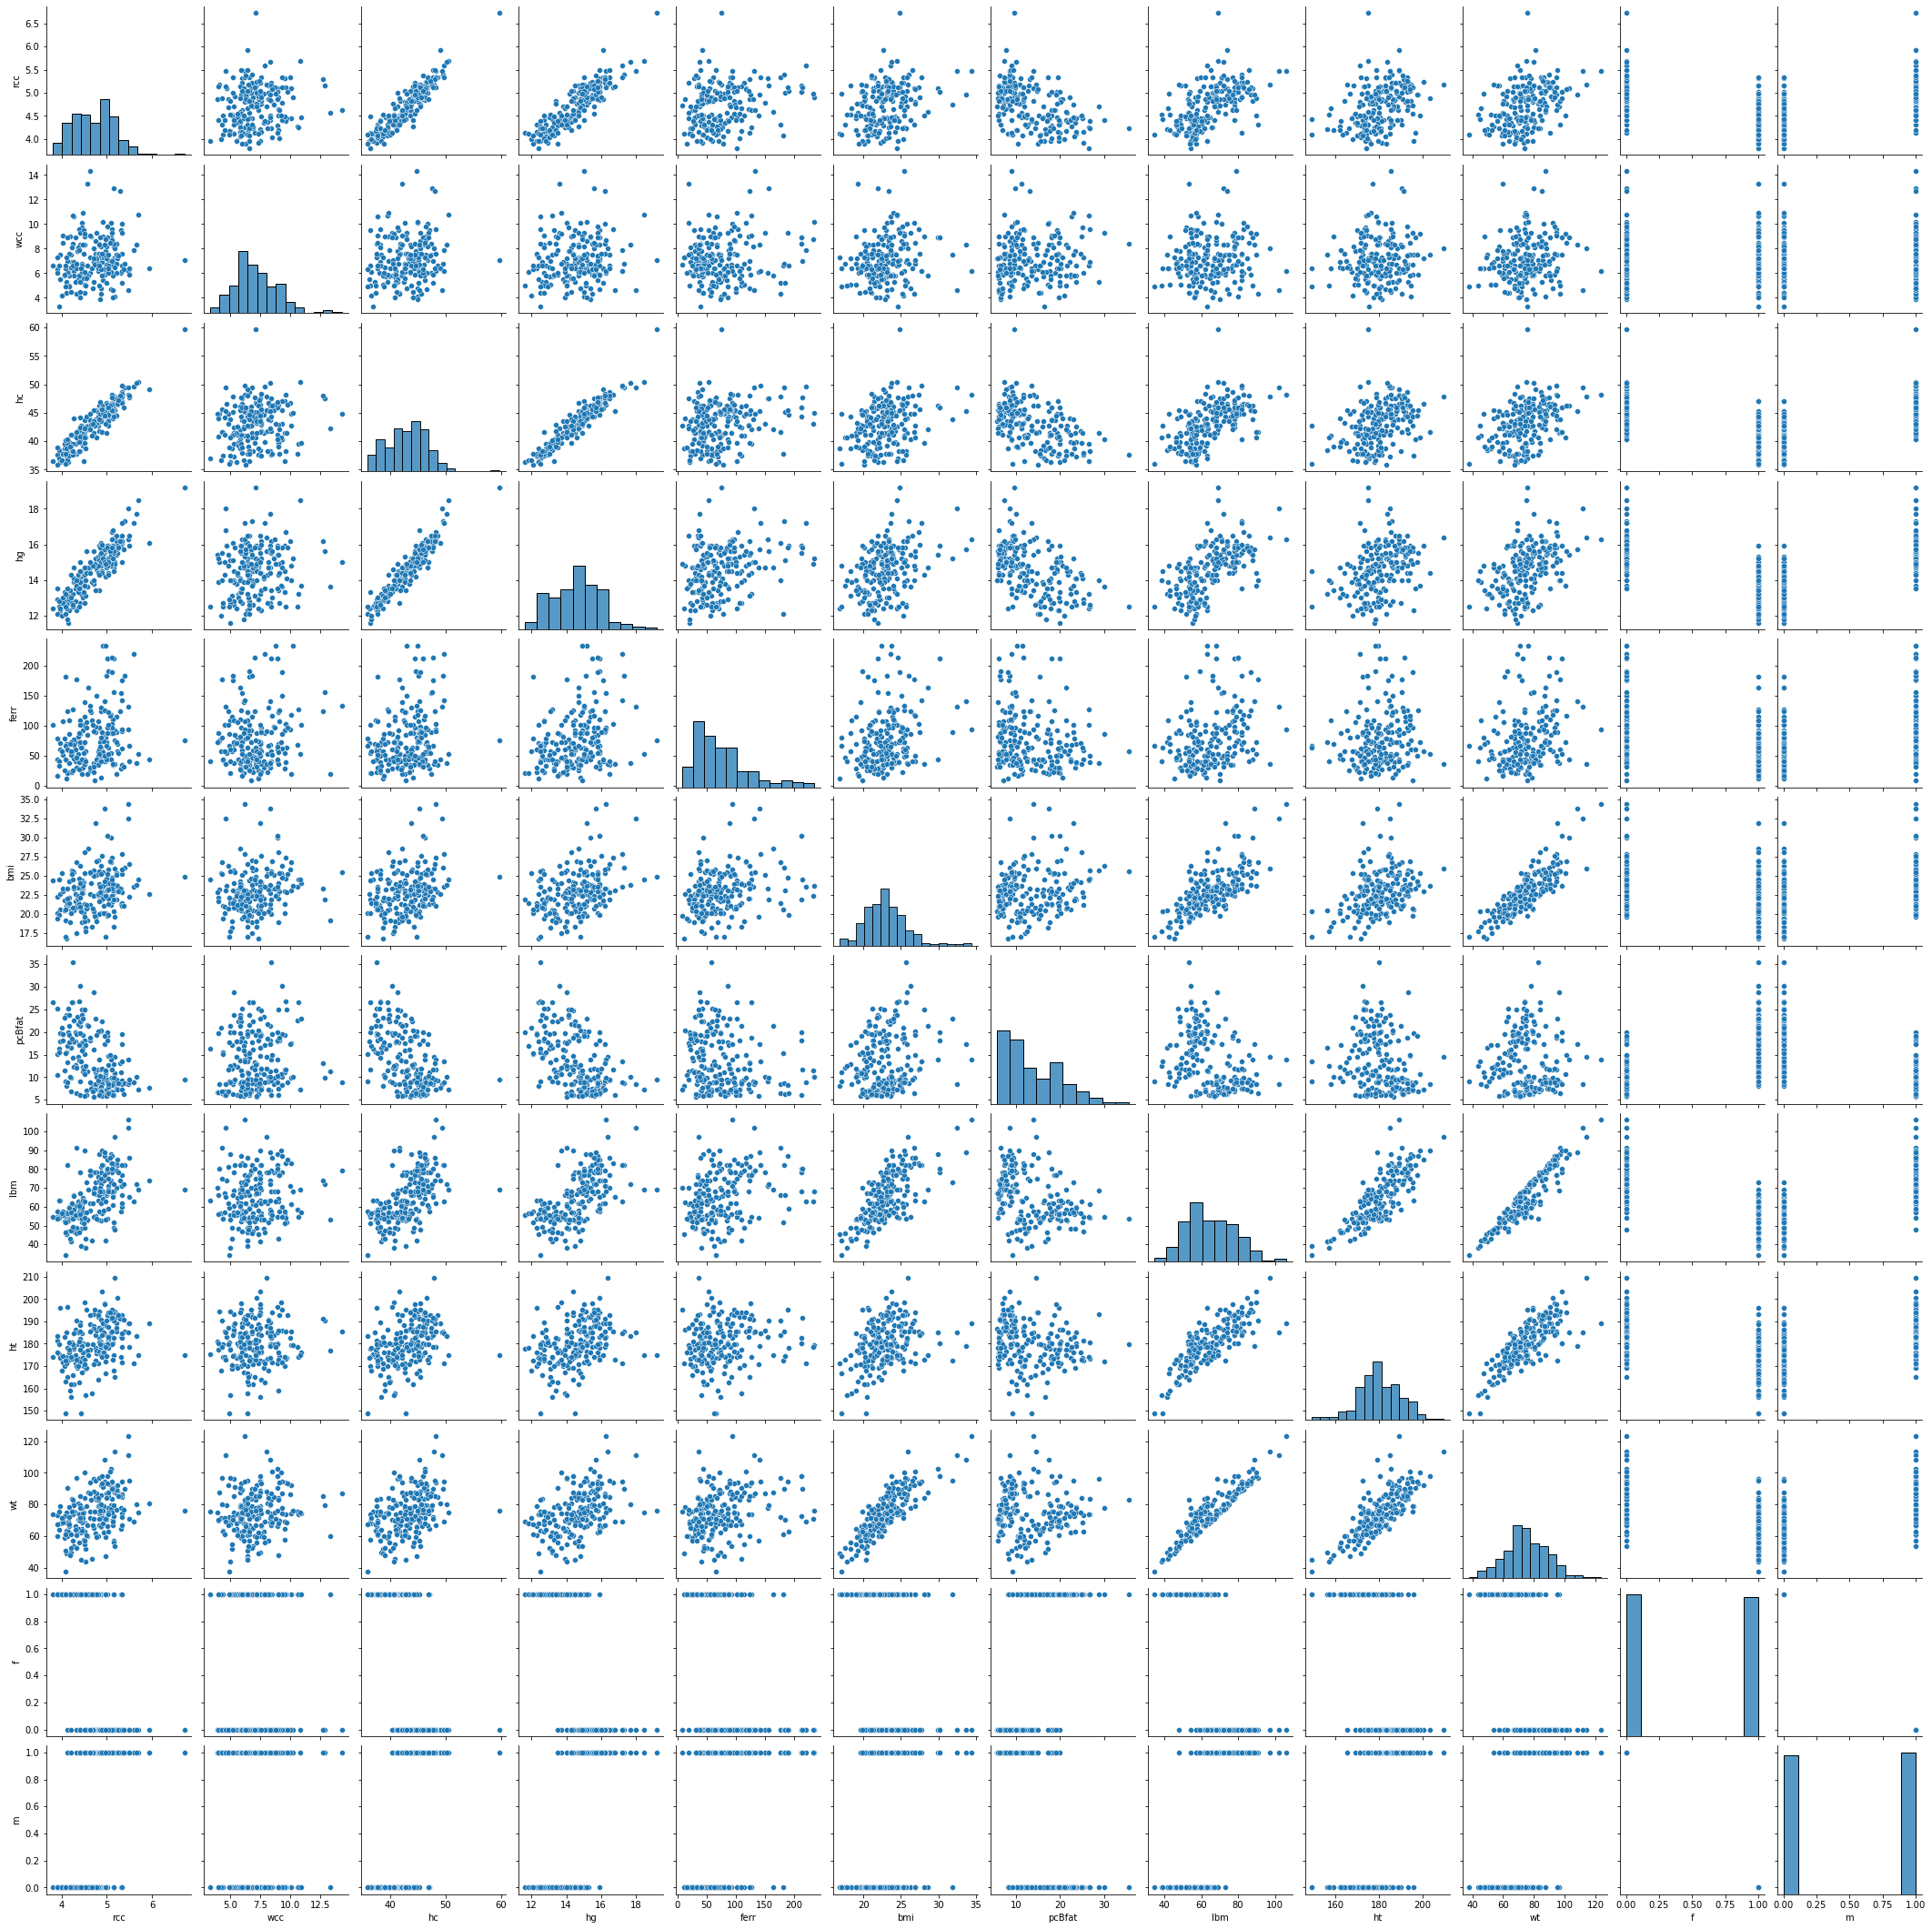

In [75]:
sns.pairplot(X)

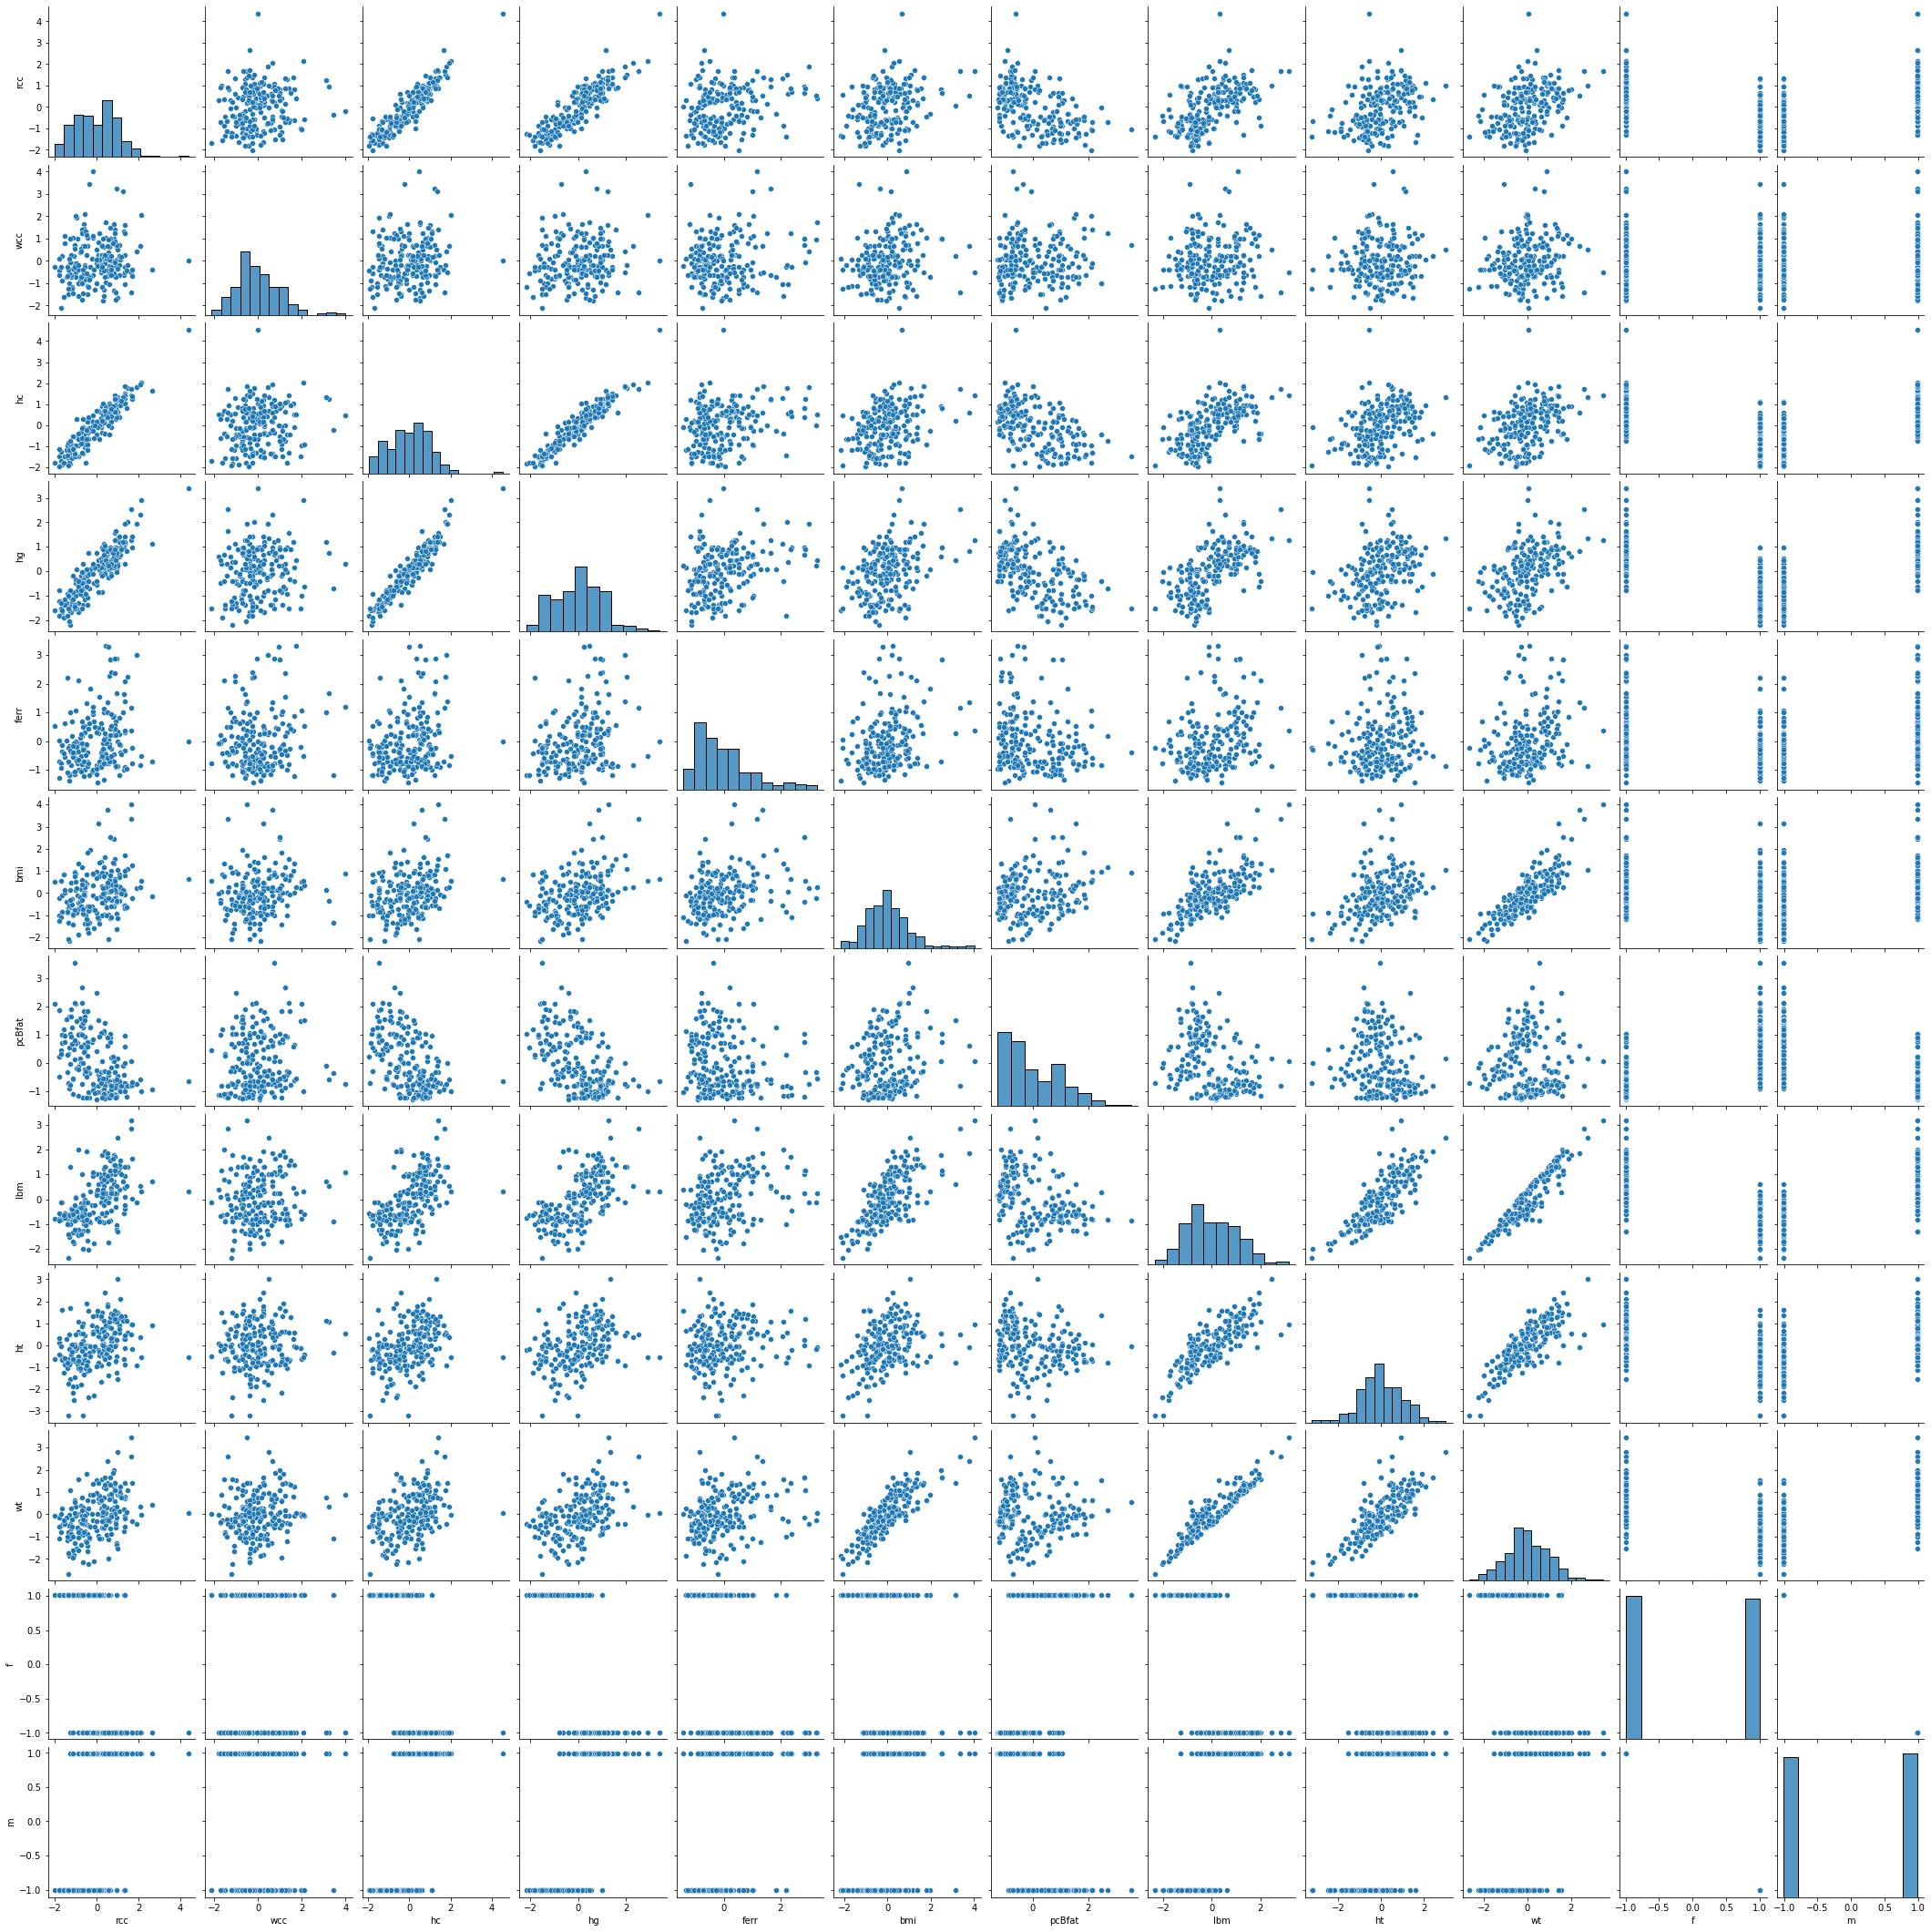

In [90]:
sns.pairplot(Xss)

### 4. Clustering with K-Means

- Cluster the data to our our target groups.
    - Use sklearn.cluster.KMeans
- We know that there are 2 actual classes. Lets try using 2, 4. Run the clustering algorithm with each of those k values.

In [92]:
# ANSWER
from sklearn.cluster import KMeans

In [97]:
k = 2 
k_mean2 = KMeans(n_clusters=k)
k_mean2.fit(Xss)
print(k_mean2.labels_)
print(k_mean2.cluster_centers_)
print(k_mean2.inertia_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[-0.69200963 -0.07773589 -0.71224368 -0.73506611 -0.42010265 -0.34475249
   0.68547819 -0.76377659 -0.56803623 -0.55639524  0.99014754 -0.99014754]
 [ 0.69200963  0.07773589  0.71224368  0.73506611  0.42010265  0.34475249
  -0.68547819  0.76377659  0.56803623  0.55639524 -0.99014754  0.99014754]]
1318.2249057028446


In [98]:
k = 4
k_mean4 = KMeans(n_clusters=k)
k_mean4.fit(Xss)
print(k_mean4.labels_)
print(k_mean4.cluster_centers_)
print(k_mean4.inertia_)

[2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2
 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 1 2 2 2 2 1 1 1 1 3 2 2 2 2 2
 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 3 3 3 0 0 3 3 0 3 0 3
 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 3 0 0 0 0 0 3 0 3 3 3 3 3 3 3 0 0 3 3
 3 3 3 3 3 3 3 3 3 3 0 0 3 0 0 3 0 3 3 3 3 3 3 3 3 3 3 0 0 0 0 3 3 0 0 0 0
 0 0 3 0 0 0 0 3 0 0 0 3 0 3 3 3 3]
[[ 0.61551747  0.39767017  0.6728176   0.68556949  0.68688106  0.91853708
  -0.42805228  1.31063668  1.01337757  1.22977806 -0.99014754  0.99014754]
 [-0.6317595  -0.18838872 -0.66096667 -0.75214323 -0.37602558 -1.11549089
  -0.1510127  -1.25525513 -1.30313895 -1.39973012  1.00995049 -1.00995049]
 [-0.74726837 -0.02038182 -0.76989352 -0.76083293 -0.4344112   0.07155352
   1.16685479 -0.51225156 -0.18181583 -0.1054551   1.00995049 -1.00995049]
 [ 0.74598743 -0.25389832  0.73587117  0.77210582  0.10399574 -0.28408268
  -0.95004727  0.15337094  0.06723764 -0.18633439 -0.95092993  0.950

### 5. Get the labels for the models

In [99]:
# ANSWER
k_mean2.labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int32)

In [100]:
k_mean4.labels_

array([2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 0, 0, 3, 3, 0, 3, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 0, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0,
       3, 3, 3, 3], dtype=int32)

### 6. Elbow Method For Optimal k

For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre. As k increases, the sum of squared distance tends to zero. 

In [102]:
# ANSWER
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(Xss)
    distortions.append(kmeanModel.inertia_)

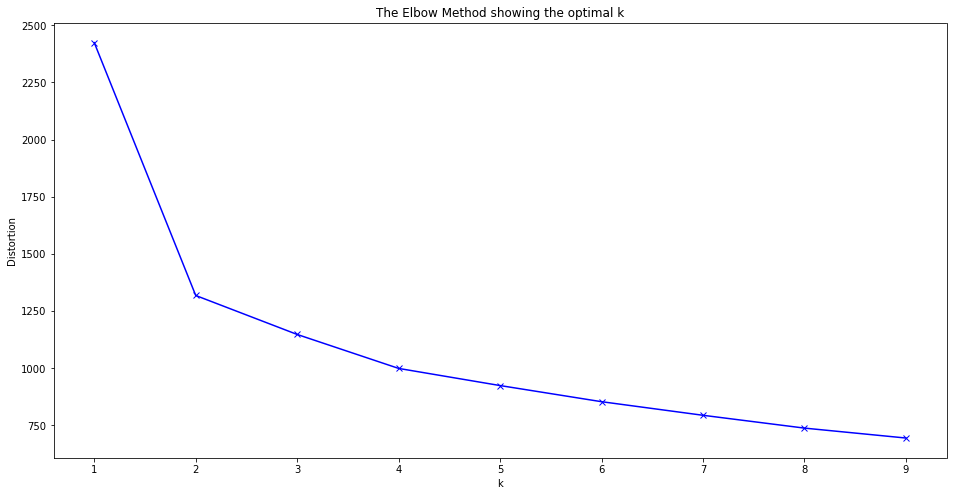

In [103]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

In [0]:
# ANSWER

### 7. Plot `ht` vs. `wt` using the clusters from each model.

- Plot ht, wt using hue sex
- Plot ht, wt using hue label

Each time, compare to the actual species classification.

In [0]:
# ANSWER





---



---



> > > > > > > > > © 2019 Institute of Data


---



---



